In [77]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\buchh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [79]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [80]:
# Fetch the Bitcoin news articles
btc_news_articles = newsapi.get_everything(q='bitcoin+Bitcoin+BTC', language='en')

In [81]:
# Fetch the Ethereum news articles
eth_news_articles = newsapi.get_everything(q='ethereum+Ethereum+ETH', language='en')

In [82]:
# Create the Bitcoin sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
btc_articles = []
for article in btc_news_articles['articles']:
    try:
        sentiment = sid.polarity_scores(article['description'])
        text = article['content']
        
        btc_articles.append({
            'compound': sentiment['compound'],
            'negative': sentiment['neg'],
            'neutral':sentiment['neu'],
            'positive':sentiment['pos'],
            'text':text})
        btc_df = pd.DataFrame(btc_articles)
    except AttributeError:
        pass

btc_df.head()

,compound,negative,neutral,positive,text
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December..."
2,-0.3400,0.094,0.906,0.000,"In September, the SkyBridge Alternatives (SALT..."
3,0.3818,0.149,0.652,0.199,"There over 7,900 cryptocurrencies today, and t..."
4,0.0000,0.000,1.000,0.000,That's good! But it won't protect you if a thi...


In [83]:
# Create the Ethereum sentiment scores DataFrame
eth_articles = []
for article in eth_news_articles['articles']:
    try:
        sentiment = sid.polarity_scores(article['description'])
        text = article['content']
        
        eth_articles.append({
            'compound': sentiment['compound'],
            'negative': sentiment['neg'],
            'neutral':sentiment['neu'],
            'positive':sentiment['pos'],
            'text':text})
        eth_df = pd.DataFrame(eth_articles)
    except AttributeError:
        pass

eth_df.head()

,compound,negative,neutral,positive,text
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December..."
2,0.7351,0.000,0.813,0.187,Ethereum has been on a tear this year. Its out...
3,0.0000,0.000,1.000,0.000,Amid the news of Bitcoin's price plunge on Sat...
4,-0.6124,0.312,0.688,0.000,A highly in-demand non-fungible token (NFT) wa...


In [84]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.005880,0.063500,0.869550,0.066950
std,0.379472,0.086044,0.116836,0.082492
min,-0.624900,0.000000,0.552000,0.000000
25%,-0.352975,0.000000,0.842000,0.000000
50%,0.000000,0.000000,0.886000,0.000000
75%,0.323650,0.107750,0.929000,0.138500
max,0.670500,0.278000,1.000000,0.234000


In [85]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.209230,0.042800,0.849200,0.10800
std,0.398944,0.085774,0.131521,0.10873
min,-0.612400,0.000000,0.552000,0.00000
25%,-0.019300,0.000000,0.743000,0.00000
50%,0.038600,0.000000,0.864500,0.08200
75%,0.601275,0.053750,0.962500,0.19875
max,0.771700,0.312000,1.000000,0.29600


In [87]:
#Questions:
#Which coin had the highest mean positive score?
#ETH
#Which coin had the highest compound score?
#BTC
#Which coin had the highest positive score?
#ETH

In [88]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [89]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_add_ons = {'ha', 'the','chars','char'}

In [90]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
   
    return tokens

In [91]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df

,compound,negative,neutral,positive,text,tokens
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ...","[earlier, this, year, nothing, released, a, pa..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December...","[available, for, the, same, price, 99, on, dec..."
2,-0.3400,0.094,0.906,0.000,"In September, the SkyBridge Alternatives (SALT...","[in, september, the, skybridge, alternative, s..."
3,0.3818,0.149,0.652,0.199,"There over 7,900 cryptocurrencies today, and t...","[there, over, 7900cryptocurrenciestoday, and, ..."
4,0.0000,0.000,1.000,0.000,That's good! But it won't protect you if a thi...,"[thats, good, but, it, wont, protect, you, if,..."
5,-0.4019,0.278,0.722,0.000,The matter was escalated to Twitter and the ac...,"[the, matter, wa, escalated, to, twitter, and,..."
6,-0.6249,0.151,0.849,0.000,The bitcoin futures exchange-traded fund run b...,"[the, bitcoin, future, exchangetraded, fund, r..."
7,-0.4939,0.078,0.922,0.000,The US has returned $154 million in bitcoins s...,"[the, u, ha, returned, 154, million, in, bitco..."
8,-0.2960,0.050,0.950,0.000,Source: Alex Dobie / Android Central\r\nCarl P...,"[source, alex, dobie, android, centralcarl, pe..."
9,0.3400,0.000,0.866,0.134,Do you want to use your cryptocurrency holding...,"[do, you, want, to, use, your, cryptocurrency,..."


In [92]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df

,compound,negative,neutral,positive,text,tokens
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ...","[earlier, this, year, nothing, released, a, pa..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December...","[available, for, the, same, price, 99, on, dec..."
2,0.7351,0.000,0.813,0.187,Ethereum has been on a tear this year. Its out...,"[ethereum, ha, been, on, a, tear, this, year, ..."
3,0.0000,0.000,1.000,0.000,Amid the news of Bitcoin's price plunge on Sat...,"[amid, the, news, of, bitcoins, price, plungeo..."
4,-0.6124,0.312,0.688,0.000,A highly in-demand non-fungible token (NFT) wa...,"[a, highly, indemand, nonfungible, token, nft,..."
5,0.0772,0.065,0.863,0.072,"Vitalik Buterin. Source: A video screenshot, Y...","[vitalik, buterin, source, a, video, screensho..."
6,0.7096,0.000,0.704,0.296,7 with 7 posters participating\r\nBlockchain s...,"[7, with, 7, poster, participatingblockchain, ..."
7,0.5859,0.000,0.745,0.255,Decentralized finance or DeFi is a global fina...,"[decentralized, finance, or, defi, is, a, glob..."
8,0.0000,0.000,1.000,0.000,Last night they robbed one of the best-known c...,"[last, night, they, robbed, one, of, the, best..."
9,-0.1406,0.066,0.934,0.000,"When Ethereum first launched, it wanted to be ...","[when, ethereum, first, launched, it, wanted, ..."


In [93]:
from collections import Counter
from nltk import ngrams

In [94]:
# Generate the Bitcoin N-grams where N=2
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_df)
eth_tokens = get_token(eth_df)

def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count


bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('earlier', 'this'): 2,
 ('this', 'year'): 3,
 ('year', 'nothing'): 1,
 ('nothing', 'released'): 1,
 ('released', 'a'): 1,
 ('a', 'pair'): 1,
 ('pair', 'of'): 1,
 ('of', 'relatively'): 1,
 ('relatively', 'cheap'): 1,
 ('cheap', '99'): 1,
 ('99', 'ear'): 1,
 ('ear', '1'): 4,
 ('1', 'earbuds'): 4,
 ('earbuds', 'with'): 1,
 ('with', 'a'): 1,
 ('a', 'fun'): 1,
 ('fun', 'transparent'): 1,
 ('transparent', 'case'): 1,
 ('case', 'wireless'): 1,
 ('wireless', 'charging'): 1,
 ('charging', 'and'): 1,
 ('and', 'decent'): 1,
 ('decent', 'sound'): 1,
 ('sound', 'quality'): 1,
 ('quality', 'now'): 1,
 ('now', 'the'): 1,
 ('the', 'company'): 1,
 ('company', 'created'): 1,
 ('created', 'by'): 1,
 ('by', 'oneplus'): 1,
 ('oneplus', 'cofounde'): 1,
 ('cofounde', '1395'): 1,
 ('1395', 'char'): 1,
 ('char', 'available'): 1,
 ('available', 'for'): 1,
 ('for', 'the'): 1,
 ('the', 'same'): 1,
 ('same', 'price'): 1,
 ('price', '99'): 1,
 ('99', 'on'): 1,
 ('on', 'december'): 2,
 ('december', '13ththe'): 1,


In [95]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('earlier', 'this'): 2,
 ('this', 'year'): 4,
 ('year', 'nothing'): 1,
 ('nothing', 'released'): 1,
 ('released', 'a'): 1,
 ('a', 'pair'): 1,
 ('pair', 'of'): 1,
 ('of', 'relatively'): 1,
 ('relatively', 'cheap'): 1,
 ('cheap', '99'): 1,
 ('99', 'ear'): 1,
 ('ear', '1'): 4,
 ('1', 'earbuds'): 4,
 ('earbuds', 'with'): 1,
 ('with', 'a'): 1,
 ('a', 'fun'): 1,
 ('fun', 'transparent'): 1,
 ('transparent', 'case'): 1,
 ('case', 'wireless'): 1,
 ('wireless', 'charging'): 1,
 ('charging', 'and'): 1,
 ('and', 'decent'): 1,
 ('decent', 'sound'): 1,
 ('sound', 'quality'): 1,
 ('quality', 'now'): 1,
 ('now', 'the'): 1,
 ('the', 'company'): 1,
 ('company', 'created'): 1,
 ('created', 'by'): 1,
 ('by', 'oneplus'): 1,
 ('oneplus', 'cofounde'): 1,
 ('cofounde', '1395'): 1,
 ('1395', 'char'): 1,
 ('char', 'available'): 1,
 ('available', 'for'): 1,
 ('for', 'the'): 2,
 ('the', 'same'): 1,
 ('same', 'price'): 1,
 ('price', '99'): 1,
 ('99', 'on'): 1,
 ('on', 'december'): 1,
 ('december', '13ththe'): 1,


In [96]:
 # Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [97]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('the', 31),
 ('char', 20),
 ('a', 16),
 ('in', 16),
 ('to', 16),
 ('and', 14),
 ('of', 11),
 ('it', 10),
 ('for', 9),
 ('on', 8)]

In [98]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('the', 22),
 ('a', 20),
 ('char', 20),
 ('of', 14),
 ('to', 13),
 ('and', 12),
 ('for', 11),
 ('in', 11),
 ('it', 10),
 ('on', 9)]

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

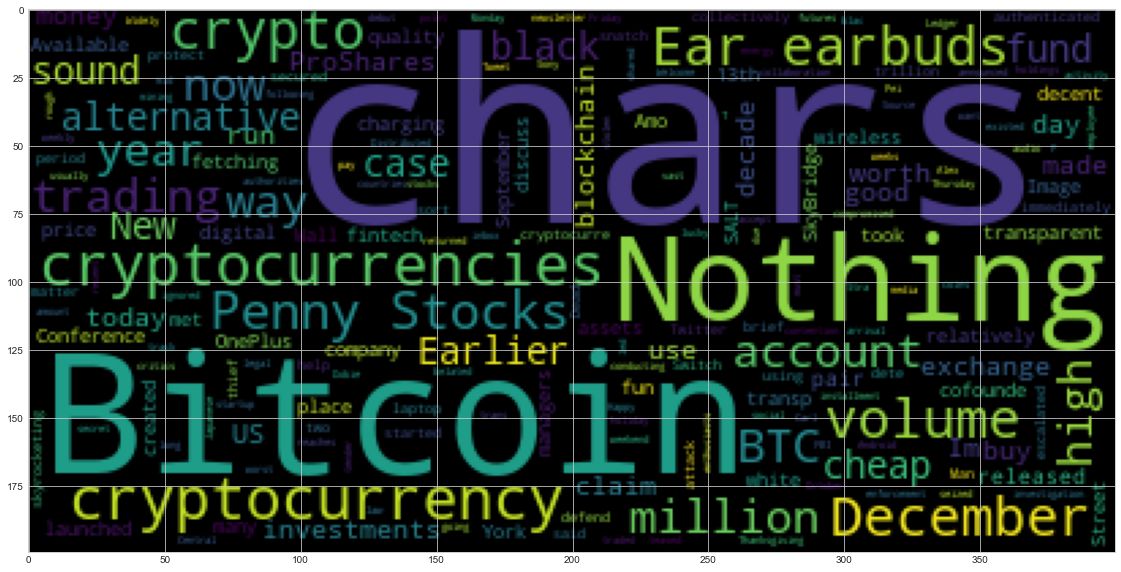

In [100]:
# Generate the Bitcoin word cloud
btc_cloud_string = ' '.join(btc_df['text'])
btc_wc = WordCloud().generate(btc_cloud_string)
plt.imshow(btc_wc);

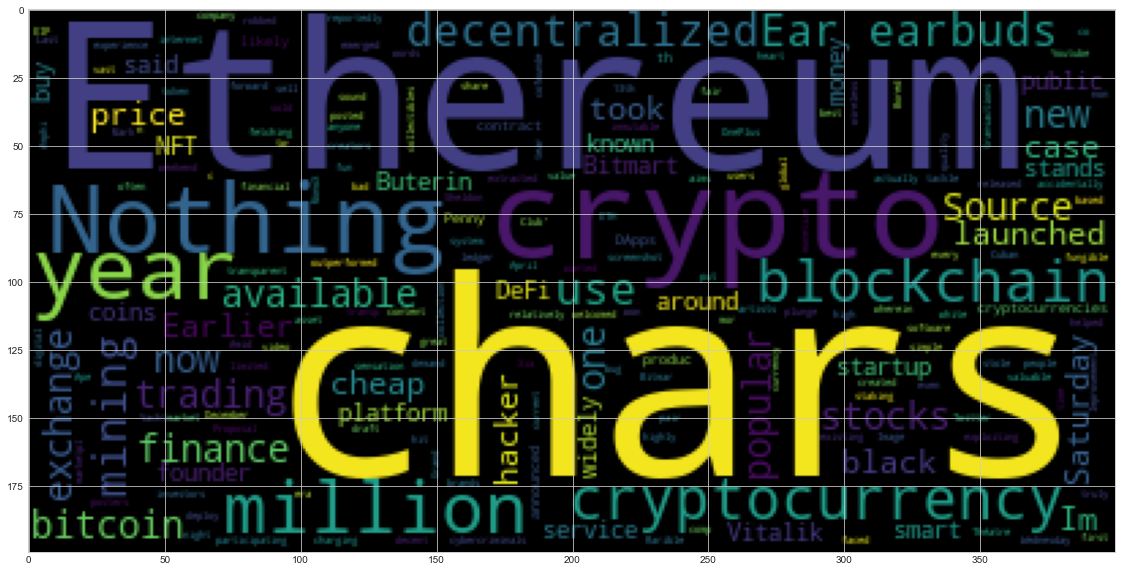

In [101]:
# Generate the Ethereum word cloud
eth_cloud_string = ' '.join(eth_df['text'])
eth_wc = WordCloud().generate(eth_cloud_string)
plt.imshow(eth_wc);

In [102]:
import spacy
from spacy import displacy

In [103]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-12-23 18:02:12.289950: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-12-23 18:02:12.289983: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [108]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [109]:
# Concatenate all of the Bitcoin text together
bitcoin_NER = btc_df["text"].str.cat()

In [110]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(btc_cloud_string)

# Add a title to the document
bitcoin_ner.user_data['title'] = 'Bitcoin NER'

In [111]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [112]:
# List all Entities
bitcoin_ent_list = [bitcoin_ner.ents]
bitcoin_ent_list

[(Earlier this year,
  99,
  OnePlus,
  99,
  December 13th,
  The Ear 1,
  Nothings Ear 1,
  earlier this year,
  September,
  the SkyBridge Alternatives,
  New York,
  Bitcoin,
  today,
  $2.7 trillion,
  over 1,200%,
  December 2019,
  two,
  Twitter,
  Tweet,
  +709,
  ProShares,
  Monday,
  its worst day,
  mid-October,
  a rough weekend,
  The ProShares Bitcoin Stra,
  US,
  $154 million,
  Sony,
  December 1,
  Japanese,
  FBI,
  Alex Dobie,
  Android Central,
  Carl Pei-,
  Nothing,
  today,
  1,
  recent weeks,
  Cryptocurrencies,
  over a decade,
  Thanksgiving,
  Distributed Ledger,
  weekly,
  Thursday,
  Friday,
  Worth Buying,
  December,
  2018,
  Pennies,
  4-decade,
  November,
  Fed,
  US,
  DXY,
  700 million,
  this year,
  800 million,
  2,
  2021,
  over $43 billion,
  2021,
  BTC,
  first,
  Bitcoin)]

In [113]:
# Concatenate all of the Ethereum text together
ethereum_NER = eth_df["text"].str.cat()

In [114]:
# Run the NER processor on all of the text
ethereum_ner = nlp(eth_cloud_string)

# Add a title to the document
ethereum_ner.user_data['title'] = 'Ethereum NER'

In [115]:
# Render the visualization
displacy.render(ethereum_ner, style = 'ent')

In [116]:
# List all Entities
ethereum_ent_list = [ethereum_ner.ents]
ethereum_ent_list

[(Earlier this year,
  99,
  OnePlus,
  99,
  December 13th,
  The Ear 1,
  Nothings Ear 1,
  earlier this year,
  this year,
  this year,
  Mark Cuban,
  Bitcoin,
  Saturday,
  the weekend,
  $196 million,
  Bitmar,
  NFT,
  3,000,
  around $ 300,000,
  April 2021,
  Youtube/Grand Amphi Théatre,
  Ethereum,
  ETH,
  Vitalik Buterin,
  Ethereum Improvement Proposal,
  EIP,
  7,
  7,
  Blockchain,
  Wednesday,
  $31 million,
  DeFi,
  Ethereum,
  DeFi,
  Last night,
  one,
  around $ 200 million,
  Sheldon Xia,
  Twitter,
  Ethereum,
  NFT,
  Alex Dobie,
  Android Central,
  Carl Pei-,
  Nothing,
  today,
  1,
  recent weeks,
  Flexpool,
  BitMart,
  late Saturday,
  $150 million,
  PeckShield,
  Cryptocurrencies,
  over a decade,
  Solana,
  DApps,
  DApps,
  Pennies)]